In [1]:
import arcpy

In [4]:
single_raster = r"C:\Users\Lauren\Documents\GIS_5091\Assignment_10_2\grdn48w122_13_CopyRaster.tif"
raster_info = arcpy.Describe(single_raster)
print(raster_info.format)
print(raster_info.spatialReference.name)

TIFF
GCS_North_American_1983


In [5]:
myRaster = arcpy.RasterToNumPyArray(single_raster)

In [6]:
myRaster.shape

(10812, 10812)

In [7]:
import matplotlib.pyplot as plt
%matplotlib notebook

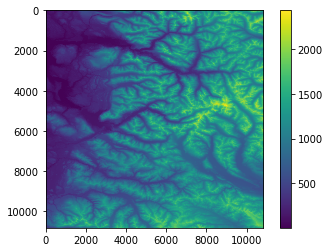

In [10]:
plt.imshow(myRaster[:,:])
plt.colorbar()

In [19]:
import numpy as np

In [31]:
def slope_function(dem, cellsize):
    #Modified from calculation found here:
    #http://geoexamples.blogspot.com/2014/03/shaded-relief-images-using-gdal-python.html

    x, y = np.gradient(dem, cellsize, cellsize)
    #slope = np.pi/2.0 - np.arctan(np.sqrt(x*x + y*y))
    slope = np.arctan(np.sqrt(x*x + y*y))
    return slope

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


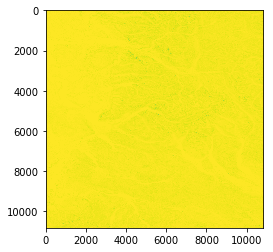

In [38]:
slope1 = slope_function(myRaster,10812)
plt.imshow(slope1)

In [39]:
myRasterInfo = arcpy.Raster(single_raster)
mx = myRasterInfo.extent.XMin + myRasterInfo.meanCellWidth
my = myRasterInfo.extent.YMin + myRasterInfo.meanCellHeight
print("Cell Size = " + str(myRasterInfo.meanCellWidth))

Cell Size = 9.259259252584056e-05


In [44]:
output_ras = arcpy.NumPyArrayToRaster(slope1, arcpy.Point(mx, my),
                                                  myRasterInfo.meanCellWidth,
                                                  myRasterInfo.meanCellHeight)
output_ras.save(r"C:\Users\Lauren\Documents\GIS_5091\Assignment_10_2\Slope1.tif")

In [45]:
arcpy.DefineProjection_management(in_dataset=r"C:\Users\Lauren\Documents\GIS_5091\Assignment_10_2\Slope1.tif", coor_system=raster_info.spatialReference)

<Result 'C:\\Users\\Lauren\\Documents\\GIS_5091\\Assignment_10_2\\Slope1.tif'>